Calibration Curve Equation: Concentration = (0.8867 * Absorbance) + 0.0389
R-squared: 0.9678


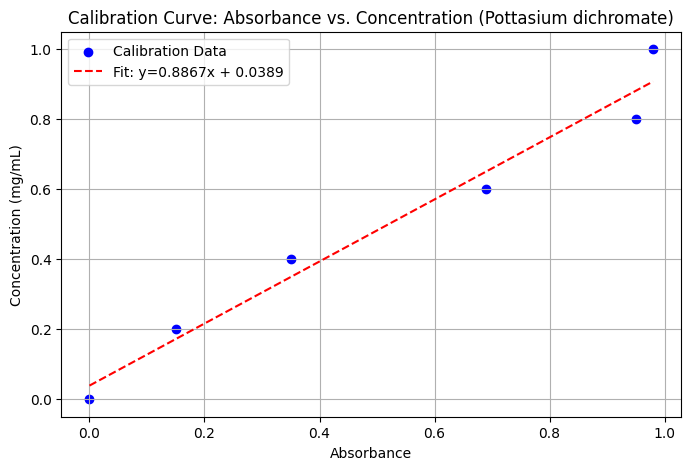

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

# Potassium Di Chromate (K2Cr207)
# Calibration Curve Data
calibration_data = {
    "Absorbance": [0, 0.15, 0.35, 0.69, 0.95, 0.98],  # Absorbance Values
    "Concentration (mg/mL)": [0 ,0.2 ,0.4 ,0.6 ,0.8,1]  # Concentration Values
}

calib_df = pd.DataFrame(calibration_data)

# Perform Linear Regression (y = mx + b)
slope, intercept, r_value, _, _ = linregress(calib_df["Absorbance"], calib_df["Concentration (mg/mL)"])

# Print Calibration Equation
print(f"Calibration Curve Equation: Concentration = ({slope:.4f} * Absorbance) + {intercept:.4f}")


# Coefficient of determination
# Shows how well the linear model fits the data.
# R=1 → Perfect positive correlation (ideal case, straight-line fit).
# R=−1 → Perfect negative correlation (not applicable here).
# R=0 → No correlation (random relationship).

print(f"R-squared: {r_value**2:.4f}")

# Plot Calibration Curve
plt.figure(figsize=(8, 5))
plt.scatter(calib_df["Absorbance"], calib_df["Concentration (mg/mL)"], color='blue', label="Calibration Data")
plt.plot(calib_df["Absorbance"], slope * calib_df["Absorbance"] + intercept, color='red', linestyle='--', label=f"Fit: y={slope:.4f}x + {intercept:.4f}")
plt.xlabel("Absorbance")
plt.ylabel("Concentration (mg/mL)")
plt.title("Calibration Curve: Absorbance vs. Concentration (Pottasium dichromate)")
plt.legend()
plt.grid()
plt.show()


In [31]:
# import pandas as pd
# df = pd.read_csv('dd.csv', sep=',')

# data_dict = df.to_dict(orient="list")
# data_dict

In [32]:

# Cell growth 
#Experimental Data (time, absorbance, pH, temp)
experimental_data = {
 'Time (hrs)': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], # Time Values
 'Absorbance': [0.28,0.74,0.83,0.43,0.34,0.25,0.3,0.34,0.3,0.3,0.26,0.29,0.27], # Measured Absorbance values
 'pH': [6.0, 5.0, 4.5, 5.5, 5.5, 6.0, 5.5, 5.0, 5.0, 4.5, 4.0, 5.0, 5.0], #pH values
 'Temperature (℃)': [30.5,27.0,27.0,27.0,30.5,30.5,31.5,30.0,30.0,32.0,33.0,35.0,31.0] # Temperature values
 }


exp_cell_df = pd.DataFrame(experimental_data)


# Convert Absorbance to Cell Growth Concentration using Calibration curve 
exp_cell_df["Cell Growth Concentration (mg/mL)"] = (exp_cell_df["Absorbance"] * slope) + intercept

exp_cell_df.head(2)


,Time (hrs),Absorbance,pH,Temperature (℃),Cell Growth Concentration (mg/mL)
0,0,0.28,6.0,30.5,0.287187
1,2,0.74,5.0,27.0,0.695079


    Time (hrs)  Specific Growth Rate (µ)
0            2                  0.441947
1            4                  0.054344
2            6                 -0.305997
3            8                 -0.105313
4           10                 -0.133581
5           12                  0.078562
6           14                  0.055019
7           16                 -0.055019
8           18                  0.000000
9           20                 -0.061831
10          22                  0.047075
11          24                 -0.030886


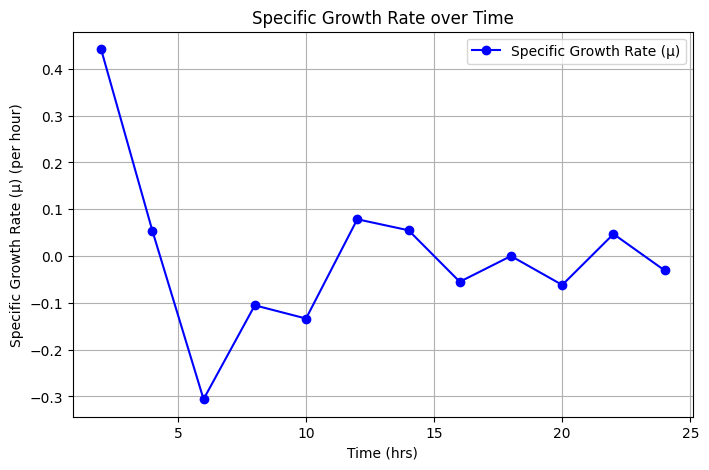

In [33]:
# # Compute specific growth rate (µ)
# X0 = exp_cell_df["Cell Growth Concentration (mg/mL)"].iloc[0]  # Initial concentration
# Xt = exp_cell_df["Cell Growth Concentration (mg/mL)"].iloc[1]  # Concentration at time t
# t = exp_cell_df["Time (hrs)"].iloc[1]  # Time duration

# # Growth rate calculation
# mu = (np.log(Xt / X0)) / t
# print(f"Specific Growth Rate (µ): {mu:.4f} per hour")


# Compute specific growth rate (µ) for multiple time intervals
mu_values = []
time_intervals = []

for i in range(1, len(exp_cell_df)):
    X0 = exp_cell_df["Cell Growth Concentration (mg/mL)"].iloc[i-1]  # Previous time concentration
    Xt = exp_cell_df["Cell Growth Concentration (mg/mL)"].iloc[i]  # Current time concentration
    t = exp_cell_df["Time (hrs)"].iloc[i] - exp_cell_df["Time (hrs)"].iloc[i-1]  # Time interval

    mu = (np.log(Xt / X0)) / t
    mu_values.append(mu)
    time_intervals.append(exp_cell_df["Time (hrs)"].iloc[i])  # Midpoint time

# Store results in DataFrame
growth_rate_df = pd.DataFrame({"Time (hrs)": time_intervals, "Specific Growth Rate (µ)": mu_values})

# Display the computed growth rates
print(growth_rate_df)

# Plot the growth rate over time
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(growth_rate_df["Time (hrs)"], growth_rate_df["Specific Growth Rate (µ)"], marker='o', linestyle='-', color='b', label="Specific Growth Rate (µ)")
plt.xlabel("Time (hrs)")
plt.ylabel("Specific Growth Rate (µ) (per hour)")
plt.title("Specific Growth Rate over Time")
plt.legend()
plt.grid()
plt.show()

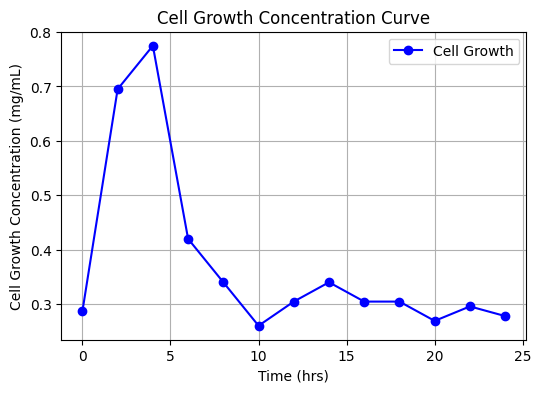

In [34]:
plt.figure(figsize=(6, 4))
plt.plot(exp_cell_df["Time (hrs)"], exp_cell_df["Cell Growth Concentration (mg/mL)"], marker='o', linestyle='-', color='b', label="Cell Growth")
plt.xlabel("Time (hrs)")
plt.ylabel("Cell Growth Concentration (mg/mL)")
plt.title("Cell Growth Concentration Curve")
plt.legend()
plt.grid(True)
plt.show()


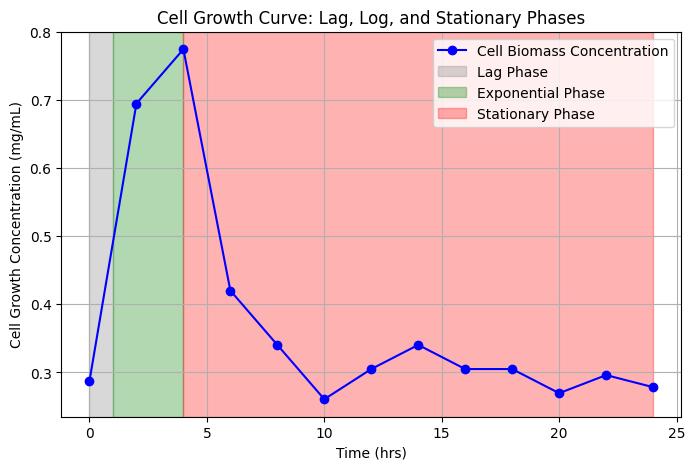

Lag Phase ends around: 1.00 hrs
Stationary Phase starts around: 4.00 hrs


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Load experimental data
time = exp_cell_df["Time (hrs)"]
cell_concentration = exp_cell_df["Cell Growth Concentration (mg/mL)"]

# Identify exponential phase using log transformation
log_concentration = np.log(cell_concentration)

# Plot Cell Growth Curve
plt.figure(figsize=(8, 5))
plt.plot(time, cell_concentration, 'o-', label="Cell Biomass Concentration", color="b")
plt.xlabel("Time (hrs)")
plt.ylabel("Cell Growth Concentration (mg/mL)")
plt.title("Cell Growth Curve: Lag, Log, and Stationary Phases")
plt.grid()

# Identify Growth Phases (Estimate)
lag_phase_end = time[cell_concentration.diff().idxmax()] * 0.5  # Approximate Lag phase end
stationary_phase_start = time[cell_concentration.idxmax()]  # Start of stationary phase

# Highlight Phases
plt.axvspan(0, lag_phase_end, color='gray', alpha=0.3, label="Lag Phase")
plt.axvspan(lag_phase_end, stationary_phase_start, color='green', alpha=0.3, label="Exponential Phase")
plt.axvspan(stationary_phase_start, time.iloc[-1], color='red', alpha=0.3, label="Stationary Phase")

plt.legend()
plt.show()

# Print Estimated Phase Boundaries
print(f"Lag Phase ends around: {lag_phase_end:.2f} hrs")
print(f"Stationary Phase starts around: {stationary_phase_start:.2f} hrs")


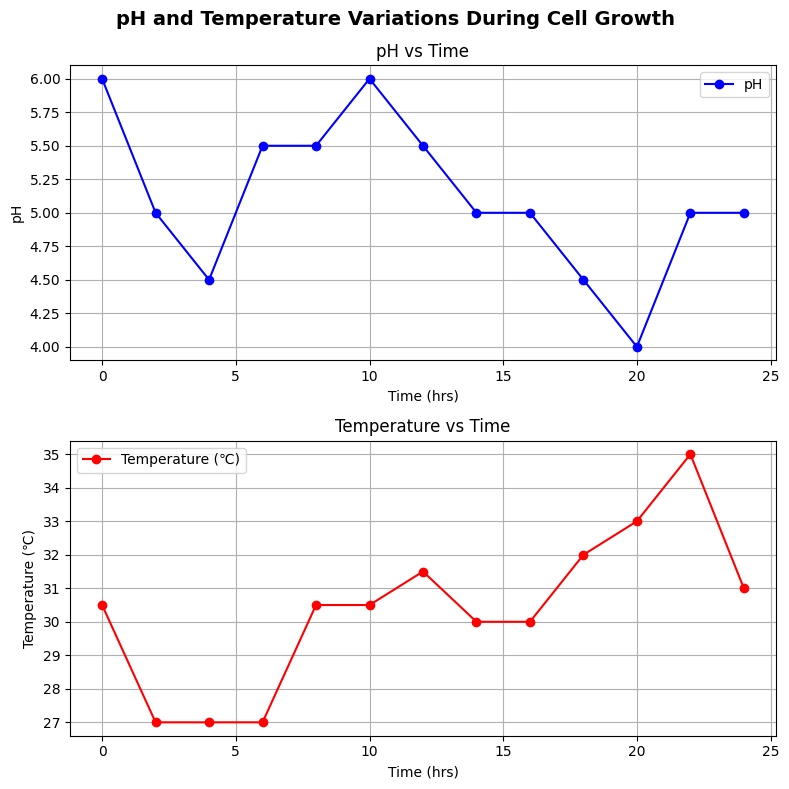

In [36]:
import matplotlib.pyplot as plt

# Load experimental data
time = exp_cell_df["Time (hrs)"]
pH = exp_cell_df["pH"]
temperature = exp_cell_df["Temperature (℃)"]

# Create stacked subplots
plt.figure(figsize=(8, 8))

# Super title for the entire figure
plt.suptitle("pH and Temperature Variations During Cell Growth", fontsize=14, fontweight='bold')

# Plot pH vs Time
plt.subplot(2, 1, 1)  # (rows, columns, index)
plt.plot(time, pH, 'o-', color="b", label="pH")
plt.xlabel("Time (hrs)")
plt.ylabel("pH")
plt.title("pH vs Time")
plt.grid()
plt.legend()

# Plot Temperature vs Time
plt.subplot(2, 1, 2)
plt.plot(time, temperature, 'o-', color="r", label="Temperature (℃)")
plt.xlabel("Time (hrs)")
plt.ylabel("Temperature (℃)")
plt.title("Temperature vs Time")
plt.grid()
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



Carrying Capacity (K): 0.00011935410167929664
Initial Cell Growth Concentration (N0): 0.5464938108720742
Growth Rate (r): 9.567888367859517e-06


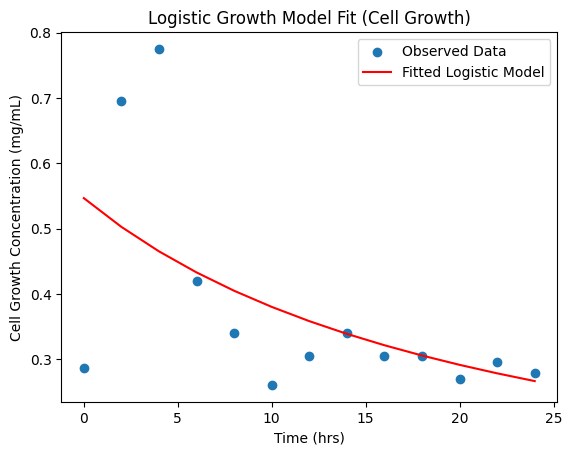

In [37]:
# Define the logistic growth model
def logistic_growth(t, K, N0, r):
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

# Extract time and cell growth concentration
time = exp_cell_df['Time (hrs)'].values
cell_growth = exp_cell_df['Cell Growth Concentration (mg/mL)'].values

# Fit the model to the data
params, _ = curve_fit(logistic_growth, time, cell_growth, p0=[4.0, 0.3, 0.5])

# Extract the parameters
K, N0, r = params
print(f"Carrying Capacity (K): {K}")
print(f"Initial Cell Growth Concentration (N0): {N0}")
print(f"Growth Rate (r): {r}")

# Generate predictions using the fitted model
predicted_growth = logistic_growth(time, K, N0, r)

# Plot the data and the fitted model
plt.scatter(time, cell_growth, label='Observed Data')
plt.plot(time, predicted_growth, label='Fitted Logistic Model', color='red')
plt.xlabel('Time (hrs)')
plt.ylabel('Cell Growth Concentration (mg/mL)')
plt.title('Logistic Growth Model Fit (Cell Growth)')
plt.legend()
plt.show()

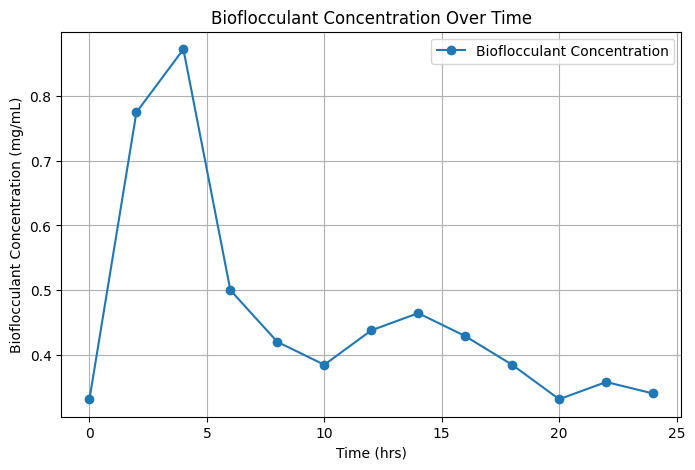

In [38]:

#Bioflocculant Production
#Experimental Data (time, absorbance, pH, temp)

experimental_data = {'Time (hrs)': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], # Time Values
 'Absorbance': [0.33, 0.83, 0.94, 0.52, 0.43, 0.39, 0.45, 0.48, 0.44, 0.39, 0.33, 0.36, 0.34], # Measured Absorbance values
 'pH': [5.0, 5.0, 5.0, 5.5, 5.6, 6.0, 5.0, 5.8, 6.0, 4.0, 6.0, 4.0, 5.0], # pH values
 'Temperature (℃)': [27.0, 30.0, 28.0, 26.5, 26.5, 33.0, 31.0, 26.5, 26.0, 33.5, 34.5, 36.5, 35.0], # Temperature values
}

exp_bp_df = pd.DataFrame(experimental_data)

# Convert Absorbance to Bioflocculant Concentration using Calibration curve 
exp_bp_df["Bioflocculant Concentration (mg/mL)"] = (exp_bp_df["Absorbance"] * slope) + intercept

# Compute Production Rate (dp/dt) using Finite Differences
exp_bp_df["Production Rate (mg/mL per hr)"] = np.gradient(exp_bp_df["Bioflocculant Concentration (mg/mL)"], exp_bp_df["Time (hrs)"])

# Plot Bioflocculant Concentration Over Time
plt.figure(figsize=(8, 5))
plt.plot(exp_bp_df["Time (hrs)"], exp_bp_df["Bioflocculant Concentration (mg/mL)"], marker='o', linestyle='-', label="Bioflocculant Concentration")
plt.xlabel("Time (hrs)")
plt.ylabel("Bioflocculant Concentration (mg/mL)")
plt.title("Bioflocculant Concentration Over Time")
plt.legend()
plt.grid()
plt.show()


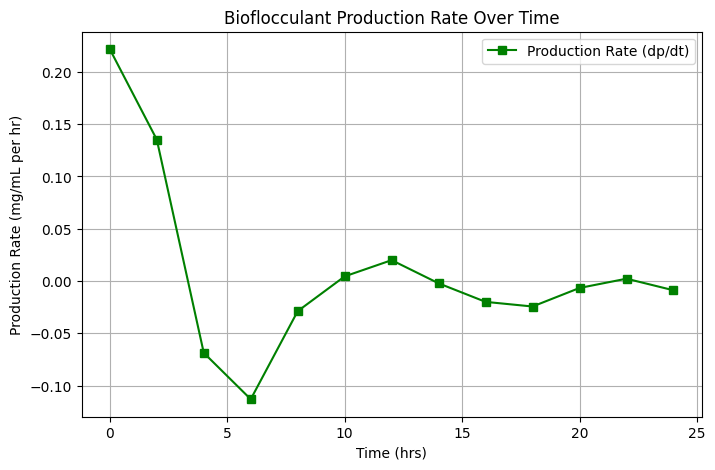

In [39]:

# Bioflocculant Production Rate Over Time
plt.figure(figsize=(8, 5))
plt.plot(exp_bp_df["Time (hrs)"], exp_bp_df["Production Rate (mg/mL per hr)"], marker='s', linestyle='-', color='green', label="Production Rate (dp/dt)")
plt.xlabel("Time (hrs)")
plt.ylabel("Production Rate (mg/mL per hr)")
plt.title("Bioflocculant Production Rate Over Time")
plt.legend()
plt.grid()
plt.show()


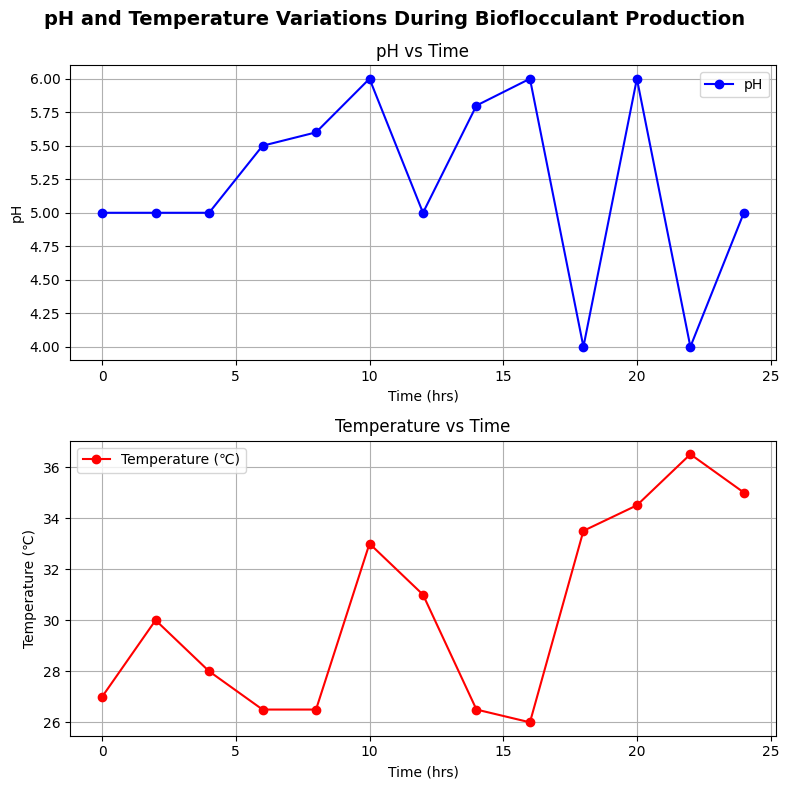

In [40]:
import matplotlib.pyplot as plt

# Load experimental data
time = exp_bp_df["Time (hrs)"]
pH = exp_bp_df["pH"]
temperature = exp_bp_df["Temperature (℃)"]

# Create stacked subplots
plt.figure(figsize=(8, 8))

# Super title for the entire figure
plt.suptitle("pH and Temperature Variations During Bioflocculant Production", fontsize=14, fontweight='bold')

# Plot pH vs Time
plt.subplot(2, 1, 1)  # (rows, columns, index)
plt.plot(time, pH, 'o-', color="b", label="pH")
plt.xlabel("Time (hrs)")
plt.ylabel("pH")
plt.title("pH vs Time")
plt.grid()
plt.legend()

# Plot Temperature vs Time
plt.subplot(2, 1, 2)
plt.plot(time, temperature, 'o-', color="r", label="Temperature (℃)")
plt.xlabel("Time (hrs)")
plt.ylabel("Temperature (℃)")
plt.title("Temperature vs Time")
plt.grid()
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



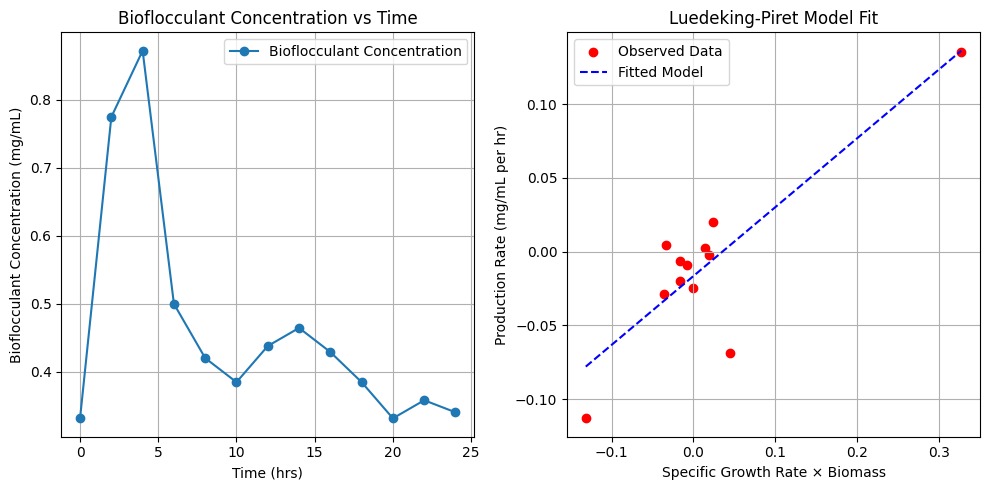

Estimated α (Growth-Associated Term): 0.4673
Estimated β (Non-Growth-Associated Term): -0.0165
R-squared value: 0.7495


In [41]:
# Extract absorbance related to cell growth (OD600)
absorbance = exp_cell_df["Absorbance"].iloc[1:].values  # Ignore the first time point

# Compute (μ × Biomass)
mu_X_values = mu_values * absorbance  # Element-wise multiplication

# Extract production rate from bioflocculant data
production_rate = exp_bp_df["Production Rate (mg/mL per hr)"].iloc[1:].values

# Fit Linear Model (Luedeking-Piret Equation: rp = α (μX) + β)
from scipy.stats import linregress

slope, intercept, r_value, _, _ = linregress(mu_X_values, production_rate)

# Predictions for plotting
mu_X_pred = np.linspace(min(mu_X_values), max(mu_X_values), 100)
production_rate_pred = slope * mu_X_pred + intercept  # Linear equation

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(exp_bp_df["Time (hrs)"], exp_bp_df["Bioflocculant Concentration (mg/mL)"], 'o-', label="Bioflocculant Concentration")
plt.xlabel("Time (hrs)")
plt.ylabel("Bioflocculant Concentration (mg/mL)")
plt.title("Bioflocculant Concentration vs Time")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(mu_X_values, production_rate, label="Observed Data", color='r')
plt.plot(mu_X_pred, production_rate_pred, label="Fitted Model", linestyle="--", color="b")
plt.xlabel("Specific Growth Rate × Biomass")
plt.ylabel("Production Rate (mg/mL per hr)")
plt.title("Luedeking-Piret Model Fit")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Display estimated parameters
print(f"Estimated α (Growth-Associated Term): {slope:.4f}")
print(f"Estimated β (Non-Growth-Associated Term): {intercept:.4f}")
print(f"R-squared value: {r_value**2:.4f}")


In [42]:
# # Ensure arrays have the correct shape for plotting
# mu_X_values = mu_values * absorbance  # Element-wise multiplication for each time point

# # Since we only have two data points, make sure arrays match in size
# if len(mu_X_values) == len(production_rate):
#     observed_x = mu_X_values
#     observed_y = production_rate
# else:
#     observed_x = np.array([mu_X_values.mean()])  # Taking mean for visualization
#     observed_y = np.array([production_rate.mean()])

# # Replot Bioflocculant Concentration vs Time
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.plot(time, bioflocculant_concentration, 'o-', label="Bioflocculant Concentration")
# plt.xlabel("Time (hrs)")
# plt.ylabel("Bioflocculant Concentration (mg/mL)")
# plt.title("Bioflocculant Concentration vs Time")
# plt.legend()
# plt.grid()

# # Replot Production Rate vs Growth Rate (Luedeking-Piret Model)
# plt.subplot(1, 2, 2)
# plt.scatter(observed_x, observed_y, label="Observed Data", color='r')
# plt.plot(mu_X_pred, production_rate_pred, label="Fitted Model", linestyle="--", color="b")
# plt.xlabel("Specific Growth Rate × Biomass")
# plt.ylabel("Production Rate (mg/mL per hr)")
# plt.title("Luedeking–Piret Model Fit")
# plt.legend()
# plt.grid()

# plt.tight_layout()
# plt.show()

# # Display estimated parameters again
# alpha_est, beta_est


Calibration Curve Equation: Concentration = (0.9705 * Absorbance) + 0.1571
R-squared: 0.9095


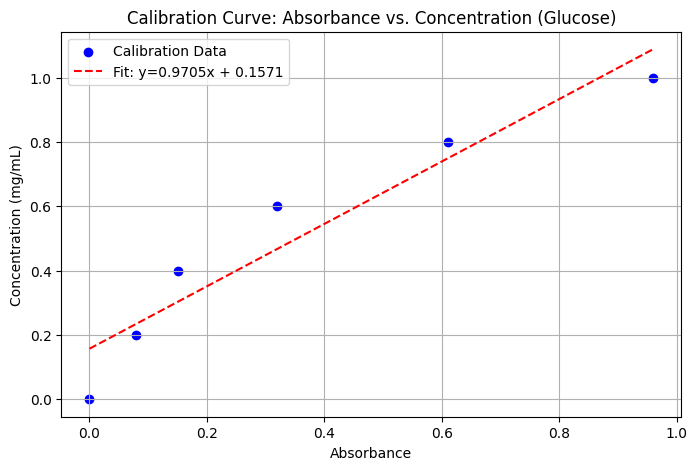

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit


# Substrate Consumption using Glucose
# Calibration Curve Data
calibration_data = {
    "Absorbance": [0,0.08,0.15,0.32,0.61,0.96],  # Absorbance Values
    "Concentration (mg/mL)": [0 ,0.2 ,0.4 ,0.6 ,0.8,1]  # Concentration Values
}

sub_calib_df = pd.DataFrame(calibration_data)

# Perform Linear Regression (y = mx + b)
slope, intercept, r_value, _, _ = linregress(sub_calib_df["Absorbance"], sub_calib_df["Concentration (mg/mL)"])

# Print Calibration Equation
print(f"Calibration Curve Equation: Concentration = ({slope:.4f} * Absorbance) + {intercept:.4f}")


# Coefficient of determination
# Shows how well the linear model fits the data.
# R=1 → Perfect positive correlation (ideal case, straight-line fit).
# R=−1 → Perfect negative correlation (not applicable here).
# R=0 → No correlation (random relationship).

print(f"R-squared: {r_value**2:.4f}")

# Plot Calibration Curve
plt.figure(figsize=(8, 5))
plt.scatter(sub_calib_df["Absorbance"], sub_calib_df["Concentration (mg/mL)"], color='blue', label="Calibration Data")
plt.plot(sub_calib_df["Absorbance"], slope * sub_calib_df["Absorbance"] + intercept, color='red', linestyle='--', label=f"Fit: y={slope:.4f}x + {intercept:.4f}")
plt.xlabel("Absorbance")
plt.ylabel("Concentration (mg/mL)")
plt.title("Calibration Curve: Absorbance vs. Concentration (Glucose)")
plt.legend()
plt.grid()
plt.show()


In [44]:
import pandas as pd
import numpy as np

# Substrate consumption 
# Experimental Data (time, absorbance, pH, temp)

experimental_data = {
 'Time (hrs)': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], # Time Values
 'Absorbance': [0.48,0.43,0.21,0.72,0.61,0.68,0.6,0.42,0.44,0.69,0.35,0.45,0.54], # Measured Absorbance values
 'pH': [6.0, 5.0, 4.5, 5.5, 5.5, 6.0, 5.5, 5.0, 5.0, 4.8, 4.0, 5.0, 5.0], #pH values
 'Temperature (℃)': [30.5,27.0,27.0,27.0,30.8,30.5,31.5,30.0,30.0,32.0,33.0,35.0,31.0] # Temperature values
 }


exp_sub_df = pd.DataFrame(experimental_data)


# Convert Absorbance to Substrate Consumption Concentration using Calibration curve 
exp_sub_df["Substrate Concentration (mg/mL)"] = (exp_sub_df["Absorbance"] * slope) + intercept

exp_sub_df['Substrate Consumption Rate (mg/mL per hr)'] = -np.gradient(exp_sub_df["Substrate Concentration (mg/mL)"], exp_sub_df["Time (hrs)"])

exp_sub_df.head(2)



,Time (hrs),Absorbance,pH,Temperature (℃),Substrate Concentration (mg/mL),Substrate Consumption Rate (mg/mL per hr)
0,0,0.48,6.0,30.5,0.622931,0.024263
1,2,0.43,5.0,27.0,0.574406,0.065509


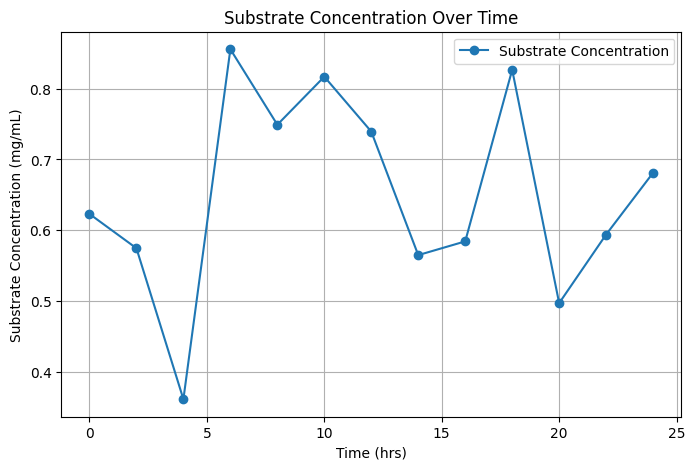

In [45]:
# Plot Substrate Concentration Over Time
plt.figure(figsize=(8, 5))
plt.plot(exp_sub_df["Time (hrs)"], exp_sub_df["Substrate Concentration (mg/mL)"], marker='o', linestyle='-', label="Substrate Concentration")
plt.xlabel("Time (hrs)")
plt.ylabel("Substrate Concentration (mg/mL)")
plt.title("Substrate Concentration Over Time")
plt.legend()
plt.grid()
plt.show()

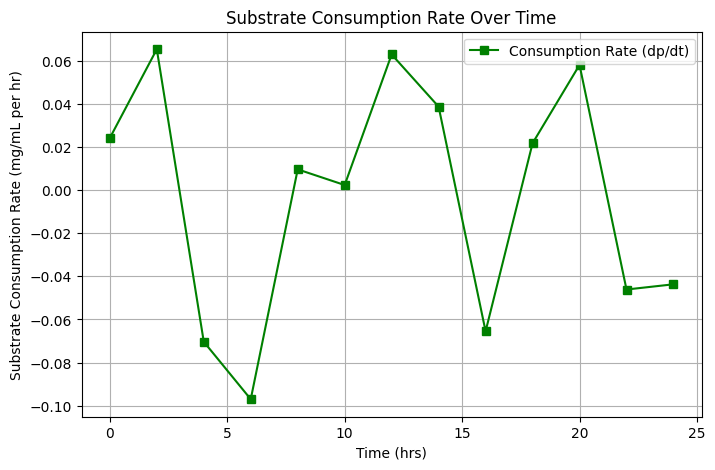

In [46]:
# Substrate Consumption Rate Over Time
plt.figure(figsize=(8, 5))
plt.plot(exp_sub_df["Time (hrs)"], exp_sub_df["Substrate Consumption Rate (mg/mL per hr)"], marker='s', linestyle='-', color='green', label="Consumption Rate (dp/dt)")
plt.xlabel("Time (hrs)")
plt.ylabel("Substrate Consumption Rate (mg/mL per hr)")
plt.title("Substrate Consumption Rate Over Time")
plt.legend()
plt.grid()
plt.show()

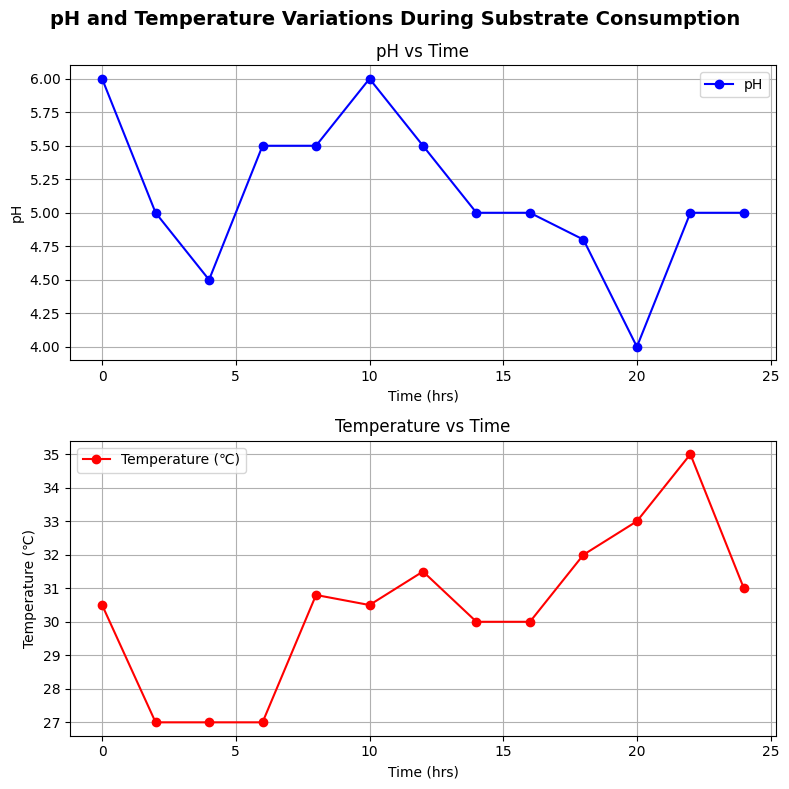

In [47]:
import matplotlib.pyplot as plt

# Load experimental data
time = exp_sub_df["Time (hrs)"]
pH = exp_sub_df["pH"]
temperature = exp_sub_df["Temperature (℃)"]

# Create stacked subplots
plt.figure(figsize=(8, 8))

# Super title for the entire figure
plt.suptitle("pH and Temperature Variations During Substrate Consumption", fontsize=14, fontweight='bold')

# Plot pH vs Time
plt.subplot(2, 1, 1)  # (rows, columns, index)
plt.plot(time, pH, 'o-', color="b", label="pH")
plt.xlabel("Time (hrs)")
plt.ylabel("pH")
plt.title("pH vs Time")
plt.grid()
plt.legend()

# Plot Temperature vs Time
plt.subplot(2, 1, 2)
plt.plot(time, temperature, 'o-', color="r", label="Temperature (℃)")
plt.xlabel("Time (hrs)")
plt.ylabel("Temperature (℃)")
plt.title("Temperature vs Time")
plt.grid()
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



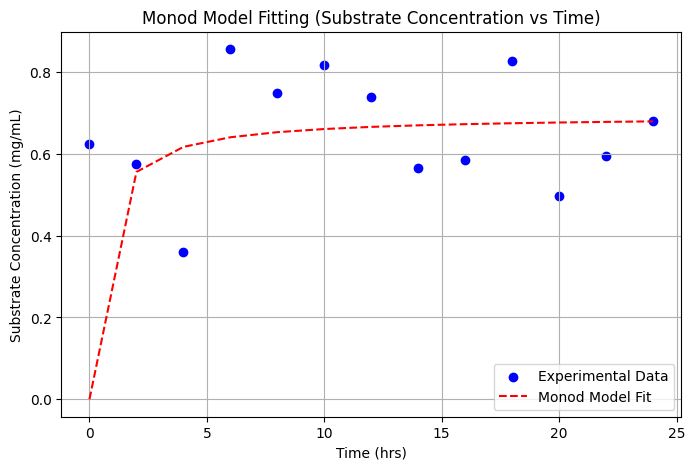

In [48]:
# Use for Substrate Consumption
# Fit Kinetic Model (Optional) - Monod Model
def monod_model(t, umax, Ks):
    return (umax * t) / (Ks + t)  # Monod equation

popt, _ = curve_fit(monod_model, exp_sub_df["Time (hrs)"], exp_sub_df["Substrate Concentration (mg/mL)"])

# Plot Fitted Monod Model
plt.figure(figsize=(8, 5))
plt.scatter(exp_sub_df["Time (hrs)"], exp_sub_df["Substrate Concentration (mg/mL)"], color='blue', label="Experimental Data")
plt.plot(exp_sub_df["Time (hrs)"], monod_model(exp_sub_df["Time (hrs)"], *popt), color='red', linestyle='--', label="Monod Model Fit")
plt.xlabel("Time (hrs)")
plt.ylabel("Substrate Concentration (mg/mL)")
plt.title("Monod Model Fitting (Substrate Concentration vs Time)")
plt.legend()
plt.grid()
plt.show()

# # Print Processed Data
# print(exp_sub_df)
# exp_sub_df.to_csv('sss.csv')